<a href="https://colab.research.google.com/github/chiaralattanzi/Coursera_Capstone/blob/master/week_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Start by creating a new Notebook for this assignment.
# setup import
import wikipedia as wp
import pandas as pd 

import requests
import io

%matplotlib inline
!pip install git+git://github.com/geopandas/geopandas.git
from shapely.geometry import Point

import geopandas as gpd
import matplotlib.pyplot as plt

# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# rename the first column to allow merging dataframes on Postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
df

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-mva0eewz
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-mva0eewz
     |████████████████████████████████| 11.8MB 2.9MB/s 
     |████████████████████████████████| 10.1MB 32.1MB/s 
  Created wheel for geopandas: filename=geopandas-0.6.1+17.g1132cc8-py2.py3-none-any.whl size=920356 sha256=d14ff5f4c1418dc5738a28a37dbd207163af905b8b080d7ec39fb155dcf8b698
  Stored in directory: /tmp/pip-ephem-wheel-cache-yn0ek42e/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:508: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


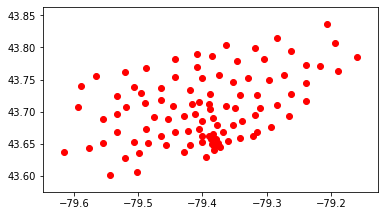

In [41]:
# load latitude and longitude into geopandas dataframe
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

# plot and show
gdf.plot(ax=ax, color='red')
plt.show()